# Data Mining: Homework 1 - Data Pre Processing
### Parsa KamaliPour - 97149081

## Import the required Packages

In [12]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display_functions import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import seaborn as sns
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.close()


import warnings
warnings.filterwarnings("ignore") # additional

## 1. read the social_network_ads.csv file and print the top 10 of it's records

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


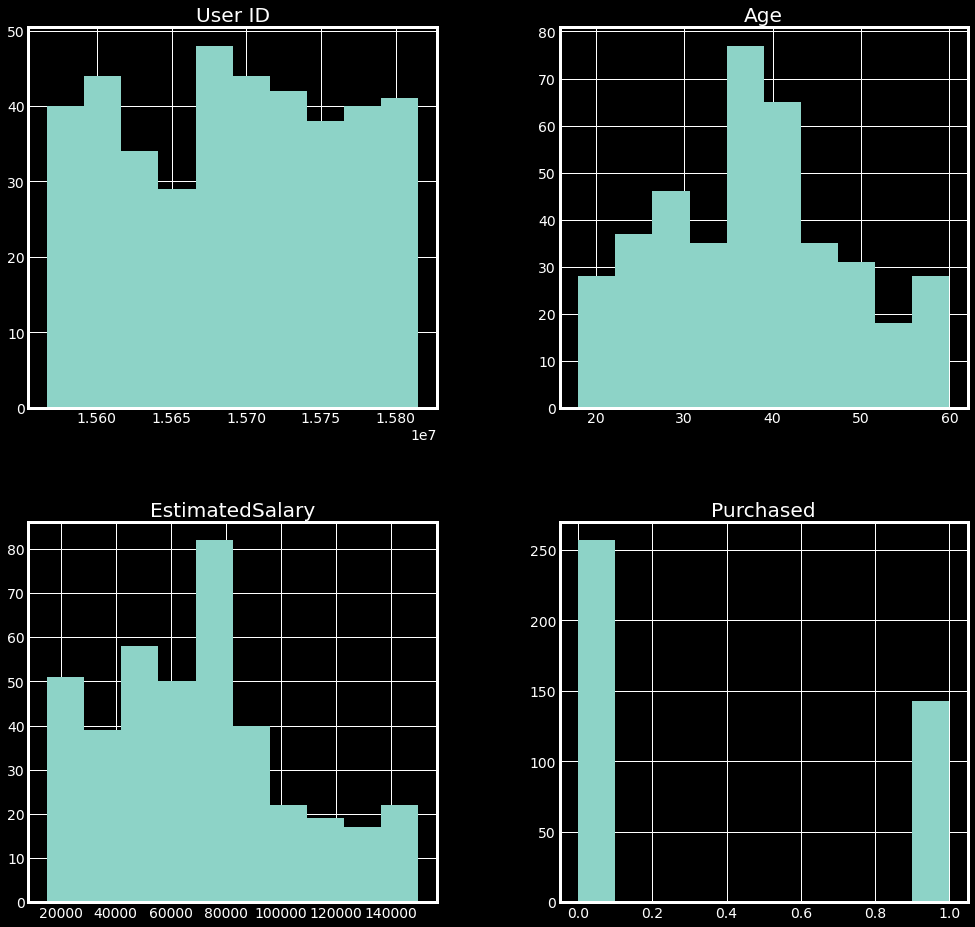

In [22]:
social_net_ads = pd.read_csv("Social_Network_Ads.csv")

display(social_net_ads)

social_net_ads.hist(figsize=(15,15))
plt.show()

In [3]:
first_10_record = social_net_ads.head(n=10)
display(first_10_record)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
x_di = social_net_ads[['EstimatedSalary']].values
y_di = social_net_ads[['Age']].values


Text(0, 0.5, 'Estimated Salary')

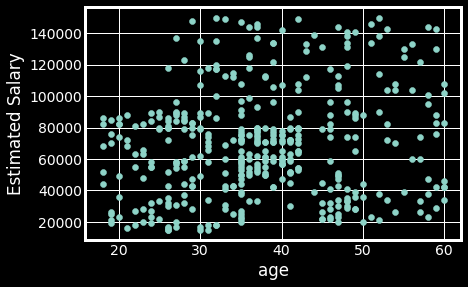

In [13]:
ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")

<AxesSubplot:>

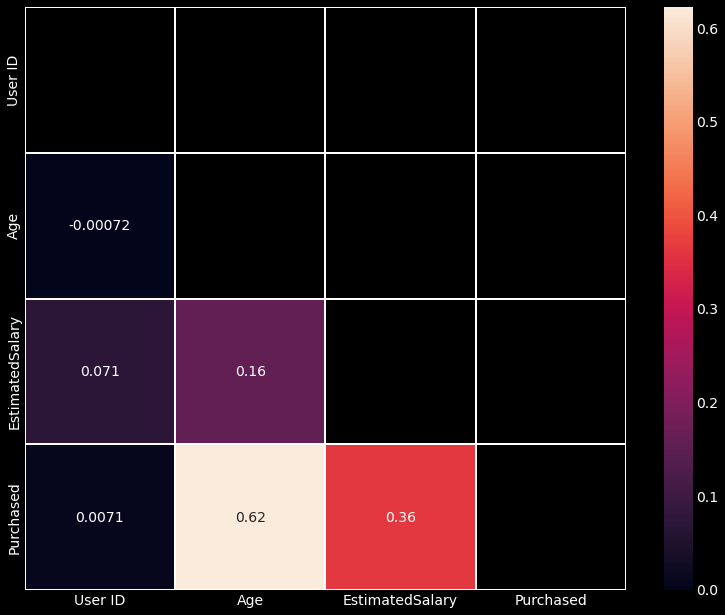

In [27]:
plt.figure(figsize=(12,10))
sub = np.triu(social_net_ads.corr())
sns.heatmap(social_net_ads.corr(), annot=True,linewidth=.15, mask=sub)

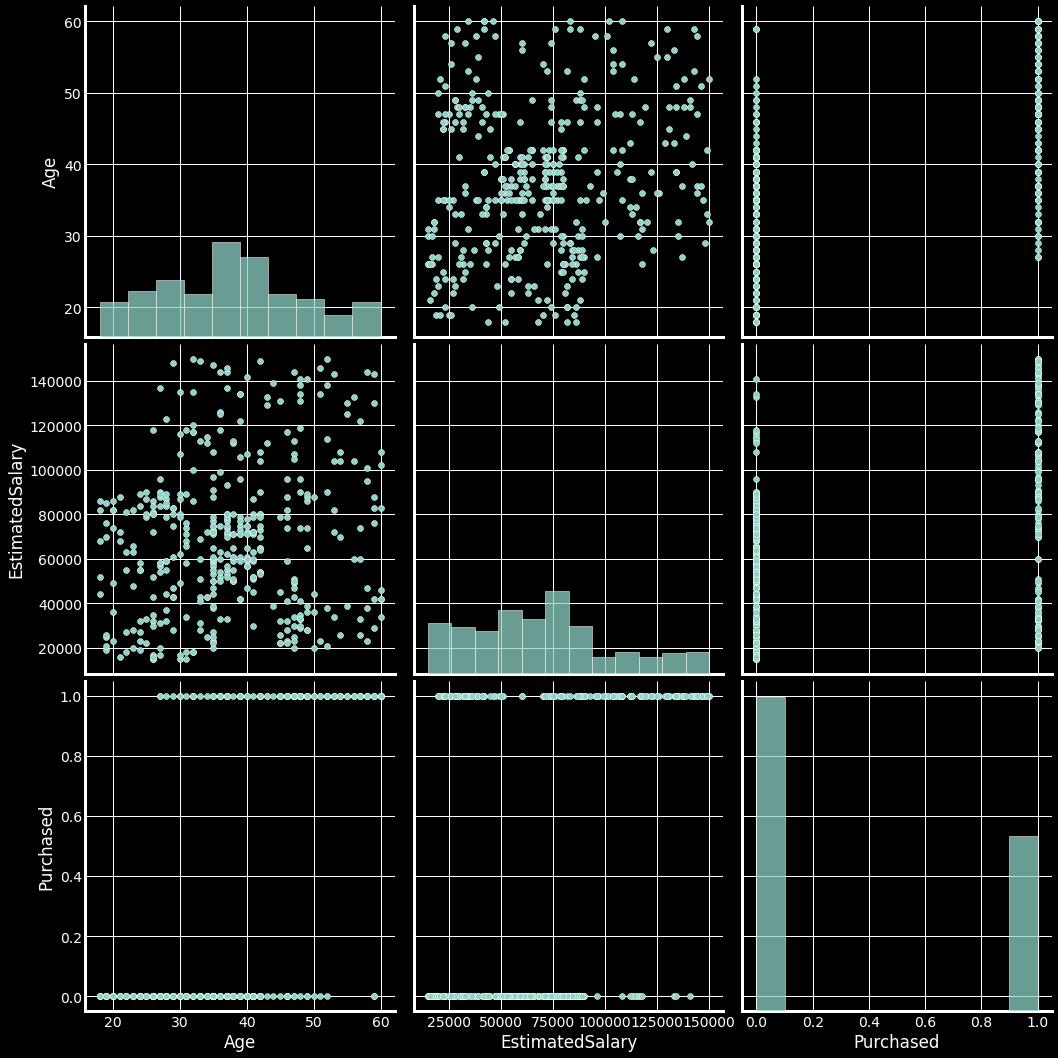

In [29]:
x = social_net_ads[["Age", 'EstimatedSalary', 'Purchased']]
sns.pairplot(x,height=5)

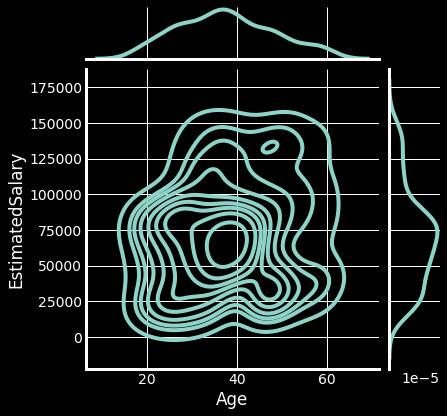

In [31]:
sns.jointplot(x=social_net_ads['Age'], y=social_net_ads['EstimatedSalary'], kind="kde")

## 2. Select columns "Age" & "EstimatedSalary" and normalize them:

### 2.1. normalize without using sklearn & it's preprocessing class

In [6]:
def z_score_calculator(org_val:float, mean:float, standard_deviation:float) -> float:
    return (org_val - mean) / standard_deviation

age = social_net_ads[['Age']].values
estimated_salary = social_net_ads[['EstimatedSalary']].values

# display(age)
# display(estimated_salary)

In [7]:
age_mean = age.mean()
age_standard_deviation = np.std(age)

print("age mean: ", age_mean)
print("age standard deviation: ",age_standard_deviation)

for i in range(len(age)):
    age[i] = z_score_calculator(age[i], age_mean, age_standard_deviation)

# display(age)

age mean:  37.655
age standard deviation:  10.46976480156073


In [8]:
estimated_salary_mean = estimated_salary.mean()
estimated_salary_standard_deviation = np.std(estimated_salary)

print("estimated_salary mean: ", estimated_salary_mean)
print("estimated_salary standard deviation: ",estimated_salary_standard_deviation)

for i in range(len(estimated_salary)):
    estimated_salary[i] = z_score_calculator(estimated_salary[i], estimated_salary_mean, estimated_salary_standard_deviation)

# display(estimated_salary)

estimated_salary mean:  69742.5
estimated_salary standard deviation:  34054.3124104716


In [9]:
normal1_social_net = deepcopy(social_net_ads)

normal1_social_net[['Age']] = age
normal1_social_net[['EstimatedSalary']] = estimated_salary

display(normal1_social_net)
display(social_net_ads)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1,-1,0
1,15810944,Male,0,-1,0
2,15668575,Female,-1,0,0
3,15603246,Female,-1,0,0
4,15804002,Male,-1,0,0
...,...,...,...,...,...
395,15691863,Female,0,0,1
396,15706071,Male,1,-1,1
397,15654296,Female,1,-1,1
398,15755018,Male,0,-1,0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:
first_10_record = normal1_social_net.head(n=10)
display(first_10_record)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1,-1,0
1,15810944,Male,0,-1,0
2,15668575,Female,-1,0,0
3,15603246,Female,-1,0,0
4,15804002,Male,-1,0,0
5,15728773,Male,-1,0,0
6,15598044,Female,-1,0,0
7,15694829,Female,0,2,1
8,15600575,Male,-1,-1,0
9,15727311,Female,0,0,0


Text(0, 0.5, 'Estimated Salary')

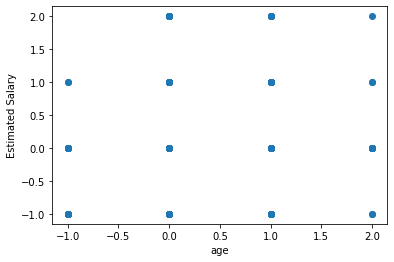

In [11]:
x_di = normal1_social_net[['EstimatedSalary']].values
y_di = normal1_social_net[['Age']].values

ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")

### 2.2. normalize using sklearn & it's preprocessing class

In [12]:
age = social_net_ads[['Age']].values
estimated_salary = social_net_ads[['EstimatedSalary']].values


In [13]:
scaler = StandardScaler()
scaler.fit(age)
print(scaler.mean_)
age = scaler.transform(age)


[37.655]


In [14]:
scaler = StandardScaler()
scaler.fit(estimated_salary)
print(scaler.mean_)
estimated_salary = scaler.transform(estimated_salary)

[69742.5]


In [15]:
normal2_social_net = deepcopy(social_net_ads)

normal2_social_net[['Age']] = age
normal2_social_net[['EstimatedSalary']] = estimated_salary

display(normal2_social_net)
display(social_net_ads)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.781797,-1.490046,0
1,15810944,Male,-0.253587,-1.460681,0
2,15668575,Female,-1.113206,-0.785290,0
3,15603246,Female,-1.017692,-0.374182,0
4,15804002,Male,-1.781797,0.183751,0
...,...,...,...,...,...
395,15691863,Female,0.797057,-0.844019,1
396,15706071,Male,1.274623,-1.372587,1
397,15654296,Female,1.179110,-1.460681,1
398,15755018,Male,-0.158074,-1.078938,0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [16]:
first_10_record = normal2_social_net.head(n=10)
display(first_10_record)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.781797,-1.490046,0
1,15810944,Male,-0.253587,-1.460681,0
2,15668575,Female,-1.113206,-0.785290,0
3,15603246,Female,-1.017692,-0.374182,0
4,15804002,Male,-1.781797,0.183751,0
5,15728773,Male,-1.017692,-0.344817,0
6,15598044,Female,-1.017692,0.418669,0
7,15694829,Female,-0.540127,2.356750,1
8,15600575,Male,-1.208719,-1.078938,0
9,15727311,Female,-0.253587,-0.139263,0


Text(0, 0.5, 'Estimated Salary')

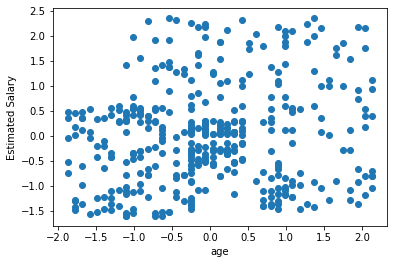

In [17]:
x_di = normal2_social_net[['EstimatedSalary']].values
y_di = normal2_social_net[['Age']].values

ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")

## 3. Select columns “Age” & “EstimatedSalary” and scale them to 0:10 range:

In [18]:
age = normal2_social_net[['Age']].values
estimated_salary = normal2_social_net[['EstimatedSalary']].values


In [19]:
mms = MinMaxScaler(feature_range=(0, 10))
mms.fit(age)
print(mms.data_max_)
age = mms.transform(age)

[2.13424088]


In [20]:
mms = MinMaxScaler(feature_range=(0, 10))
mms.fit(estimated_salary)
print(mms.data_max_)
estimated_salary = mms.transform(estimated_salary)

[2.35674998]


In [21]:
min_max_social_net = deepcopy(social_net_ads)

min_max_social_net[['Age']] = age
min_max_social_net[['EstimatedSalary']] = estimated_salary

display(min_max_social_net)
display(social_net_ads)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,0.238095,0.296296,0
1,15810944,Male,4.047619,0.370370,0
2,15668575,Female,1.904762,2.074074,0
3,15603246,Female,2.142857,3.111111,0
4,15804002,Male,0.238095,4.518519,0
...,...,...,...,...,...
395,15691863,Female,6.666667,1.925926,1
396,15706071,Male,7.857143,0.592593,1
397,15654296,Female,7.619048,0.370370,1
398,15755018,Male,4.285714,1.333333,0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [22]:
first_10_record = min_max_social_net.head(n=10)
display(first_10_record)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,0.238095,0.296296,0
1,15810944,Male,4.047619,0.370370,0
2,15668575,Female,1.904762,2.074074,0
3,15603246,Female,2.142857,3.111111,0
4,15804002,Male,0.238095,4.518519,0
5,15728773,Male,2.142857,3.185185,0
6,15598044,Female,2.142857,5.111111,0
7,15694829,Female,3.333333,10.000000,1
8,15600575,Male,1.666667,1.333333,0
9,15727311,Female,4.047619,3.703704,0


Text(0, 0.5, 'Estimated Salary')

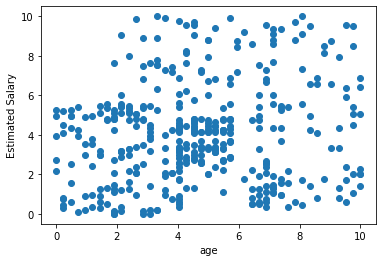

In [23]:
x_di = min_max_social_net[['EstimatedSalary']].values
y_di = min_max_social_net[['Age']].values

ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")

## 4. Select columns “Age” & “EstimatedSalary” and use RobustScaler on them:

In [25]:
age_mm = min_max_social_net[['Age']].values
estimated_salary_mm = min_max_social_net[['EstimatedSalary']].values

age_pure = social_net_ads[['Age']].values
estimated_salary_pure = social_net_ads[['EstimatedSalary']].values


In [26]:
rs = RobustScaler()
rs.fit(age_mm)
age_mm = rs.transform(age_mm)

In [28]:
rs = RobustScaler()
rs.fit(age_pure)
age_pure = rs.transform(age_pure)

In [30]:
rs = RobustScaler()
rs.fit(estimated_salary_mm)
estimated_salary_mm = rs.transform(estimated_salary_mm)

In [32]:
rs = RobustScaler()
rs.fit(estimated_salary_pure)
estimated_salary_pure = rs.transform(estimated_salary_pure)

In [60]:
robust_scaler_social_net_mm = deepcopy(social_net_ads)
robust_scaler_social_net_pure = deepcopy(social_net_ads)

robust_scaler_social_net_mm[['Age']] = age_mm
robust_scaler_social_net_mm[['EstimatedSalary']] = estimated_salary_mm

robust_scaler_social_net_pure[['Age']] = age_pure
robust_scaler_social_net_pure[['EstimatedSalary']] = estimated_salary_pure

display(robust_scaler_social_net_mm)
display(robust_scaler_social_net_pure)
display(social_net_ads)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.107692,-1.133333,0
1,15810944,Male,-0.123077,-1.111111,0
2,15668575,Female,-0.676923,-0.600000,0
3,15603246,Female,-0.615385,-0.288889,0
4,15804002,Male,-1.107692,0.133333,0
...,...,...,...,...,...
395,15691863,Female,0.553846,-0.644444,1
396,15706071,Male,0.861538,-1.044444,1
397,15654296,Female,0.800000,-1.111111,1
398,15755018,Male,-0.061538,-0.822222,0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.107692,-1.133333,0
1,15810944,Male,-0.123077,-1.111111,0
2,15668575,Female,-0.676923,-0.600000,0
3,15603246,Female,-0.615385,-0.288889,0
4,15804002,Male,-1.107692,0.133333,0
...,...,...,...,...,...
395,15691863,Female,0.553846,-0.644444,1
396,15706071,Male,0.861538,-1.044444,1
397,15654296,Female,0.800000,-1.111111,1
398,15755018,Male,-0.061538,-0.822222,0


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Text(0, 0.5, 'Estimated Salary')

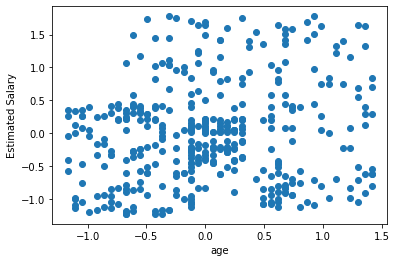

In [61]:
x_di = robust_scaler_social_net_mm[['EstimatedSalary']].values
y_di = robust_scaler_social_net_mm[['Age']].values

ax = plt.axes()
ax.scatter(x=y_di, y=x_di)
plt.xlabel("age")
plt.ylabel("Estimated Salary")

## 5. Encode the gender feature

### 5.1. Encode the gender feature using One-hot

In [62]:
gender = robust_scaler_social_net_mm[['Gender']].values

In [63]:
ohe = OneHotEncoder()
ohe.fit(gender)


OneHotEncoder()

In [64]:
ohe.categories_

[array(['Female', 'Male'], dtype=object)]

In [65]:
feature_array = ohe.fit_transform(gender).toarray()

In [66]:
feature_labels = np.array(ohe.categories_).ravel()
print(feature_labels)

['Female' 'Male']


In [67]:
feature_df = pd.DataFrame(feature_array, columns=feature_labels)
display(feature_df)

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
395,1.0,0.0
396,0.0,1.0
397,1.0,0.0
398,0.0,1.0


In [68]:
one_hot_social_net = deepcopy(robust_scaler_social_net_mm)

In [69]:
one_hot_social_net = pd.concat([one_hot_social_net, feature_df], axis=1)
display(one_hot_social_net)

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,-1.107692,-1.133333,0,0.0,1.0
1,15810944,Male,-0.123077,-1.111111,0,0.0,1.0
2,15668575,Female,-0.676923,-0.600000,0,1.0,0.0
3,15603246,Female,-0.615385,-0.288889,0,1.0,0.0
4,15804002,Male,-1.107692,0.133333,0,0.0,1.0
...,...,...,...,...,...,...,...
395,15691863,Female,0.553846,-0.644444,1,1.0,0.0
396,15706071,Male,0.861538,-1.044444,1,0.0,1.0
397,15654296,Female,0.800000,-1.111111,1,1.0,0.0
398,15755018,Male,-0.061538,-0.822222,0,0.0,1.0


In [70]:
one_hot_social_net = one_hot_social_net.drop(columns="Gender")
display(one_hot_social_net)

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,-1.107692,-1.133333,0,0.0,1.0
1,15810944,-0.123077,-1.111111,0,0.0,1.0
2,15668575,-0.676923,-0.600000,0,1.0,0.0
3,15603246,-0.615385,-0.288889,0,1.0,0.0
4,15804002,-1.107692,0.133333,0,0.0,1.0
...,...,...,...,...,...,...
395,15691863,0.553846,-0.644444,1,1.0,0.0
396,15706071,0.861538,-1.044444,1,0.0,1.0
397,15654296,0.800000,-1.111111,1,1.0,0.0
398,15755018,-0.061538,-0.822222,0,0.0,1.0


In [71]:
first_10_record = one_hot_social_net.head(n=10)
display(first_10_record)

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,-1.107692,-1.133333,0,0.0,1.0
1,15810944,-0.123077,-1.111111,0,0.0,1.0
2,15668575,-0.676923,-0.600000,0,1.0,0.0
3,15603246,-0.615385,-0.288889,0,1.0,0.0
4,15804002,-1.107692,0.133333,0,0.0,1.0
5,15728773,-0.615385,-0.266667,0,0.0,1.0
6,15598044,-0.615385,0.311111,0,1.0,0.0
7,15694829,-0.307692,1.777778,1,1.0,0.0
8,15600575,-0.738462,-0.822222,0,0.0,1.0
9,15727311,-0.123077,-0.111111,0,1.0,0.0


In [76]:
gender = ohe.inverse_transform(one_hot_social_net[['Female', 'Male']])
gender_df = pd.DataFrame(gender, columns=['Gender'])
display(gender_df)

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [77]:
rev_one_hot_social_net = deepcopy(one_hot_social_net)
rev_one_hot_social_net = pd.concat([rev_one_hot_social_net, gender_df], axis=1)
display(rev_one_hot_social_net)

,User ID,Age,EstimatedSalary,Purchased,Female,Male,Gender
0,15624510,-1.107692,-1.133333,0,0.0,1.0,Male
1,15810944,-0.123077,-1.111111,0,0.0,1.0,Male
2,15668575,-0.676923,-0.600000,0,1.0,0.0,Female
3,15603246,-0.615385,-0.288889,0,1.0,0.0,Female
4,15804002,-1.107692,0.133333,0,0.0,1.0,Male
...,...,...,...,...,...,...,...
395,15691863,0.553846,-0.644444,1,1.0,0.0,Female
396,15706071,0.861538,-1.044444,1,0.0,1.0,Male
397,15654296,0.800000,-1.111111,1,1.0,0.0,Female
398,15755018,-0.061538,-0.822222,0,0.0,1.0,Male


In [78]:
rev_one_hot_social_net = rev_one_hot_social_net.drop(columns=['Female', 'Male'])
display(rev_one_hot_social_net)

,User ID,Age,EstimatedSalary,Purchased,Gender
0,15624510,-1.107692,-1.133333,0,Male
1,15810944,-0.123077,-1.111111,0,Male
2,15668575,-0.676923,-0.600000,0,Female
3,15603246,-0.615385,-0.288889,0,Female
4,15804002,-1.107692,0.133333,0,Male
...,...,...,...,...,...
395,15691863,0.553846,-0.644444,1,Female
396,15706071,0.861538,-1.044444,1,Male
397,15654296,0.800000,-1.111111,1,Female
398,15755018,-0.061538,-0.822222,0,Male


### 5.2. Encode the gender feature using Label Encoder

In [99]:
gender = robust_scaler_social_net_mm[['Gender']].values

In [100]:
le = LabelEncoder()
le.fit(gender)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [101]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [102]:
gender_array = le.transform(gender)
display(gender_array)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [103]:
np.transpose(gender_array)

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [108]:
gender_pd = pd.DataFrame(gender_array, columns=["Gender"])

In [109]:
label_encoder_social_net = deepcopy(robust_scaler_social_net_mm)
label_encoder_social_net[['Gender']] = gender_pd
display(label_encoder_social_net)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,-1.107692,-1.133333,0
1,15810944,1,-0.123077,-1.111111,0
2,15668575,0,-0.676923,-0.600000,0
3,15603246,0,-0.615385,-0.288889,0
4,15804002,1,-1.107692,0.133333,0
...,...,...,...,...,...
395,15691863,0,0.553846,-0.644444,1
396,15706071,1,0.861538,-1.044444,1
397,15654296,0,0.800000,-1.111111,1
398,15755018,1,-0.061538,-0.822222,0


# 6. Load the Mall_customers.csv file and show it's top 10 records

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


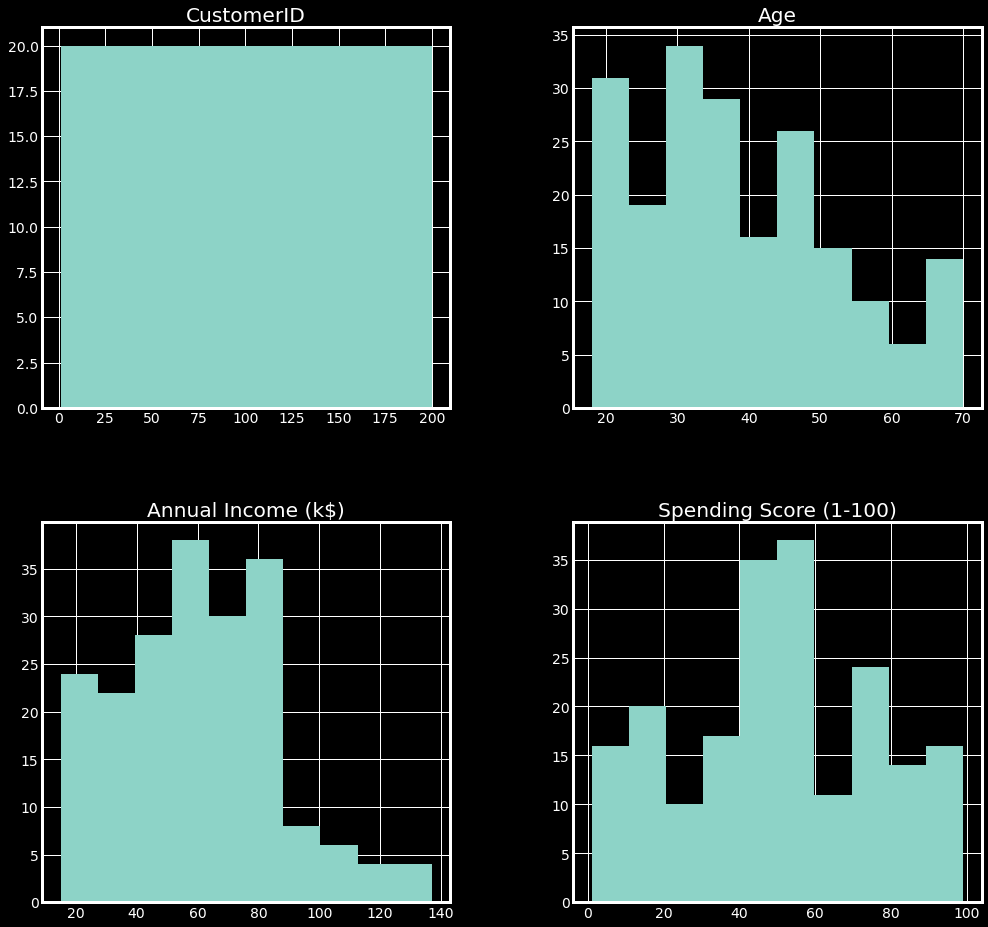

In [32]:
mall_customers = pd.read_csv("Mall_Customers.csv")
display(mall_customers)

mall_customers.hist(figsize=(15,15))
plt.show()

<AxesSubplot:>

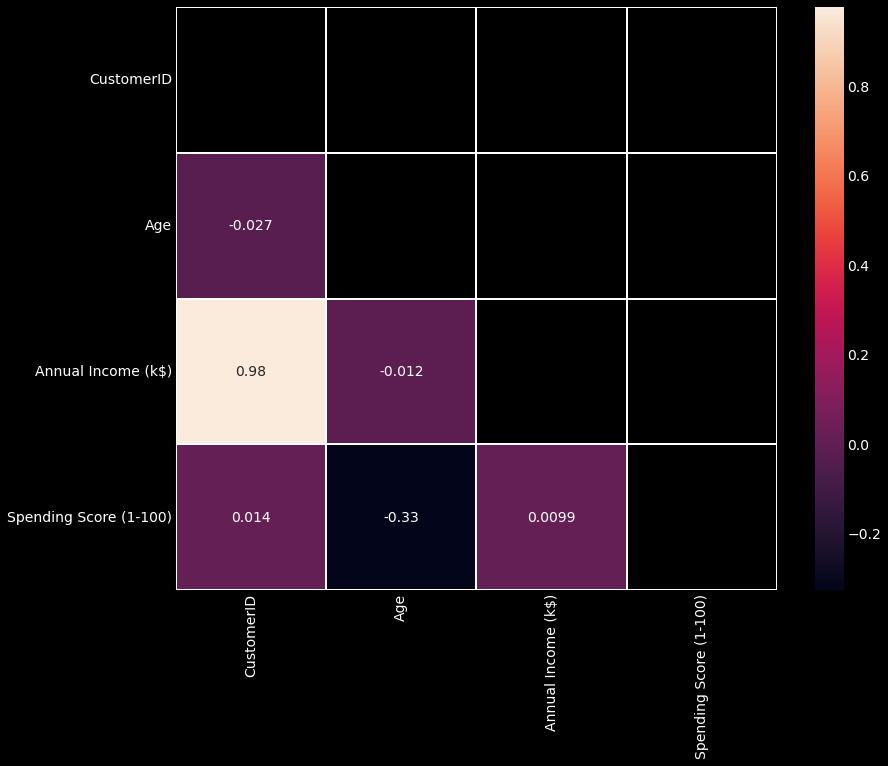

In [33]:
plt.figure(figsize=(12,10))
sub = np.triu(mall_customers.corr())
sns.heatmap(mall_customers.corr(), annot=True,linewidth=.15, mask=sub)

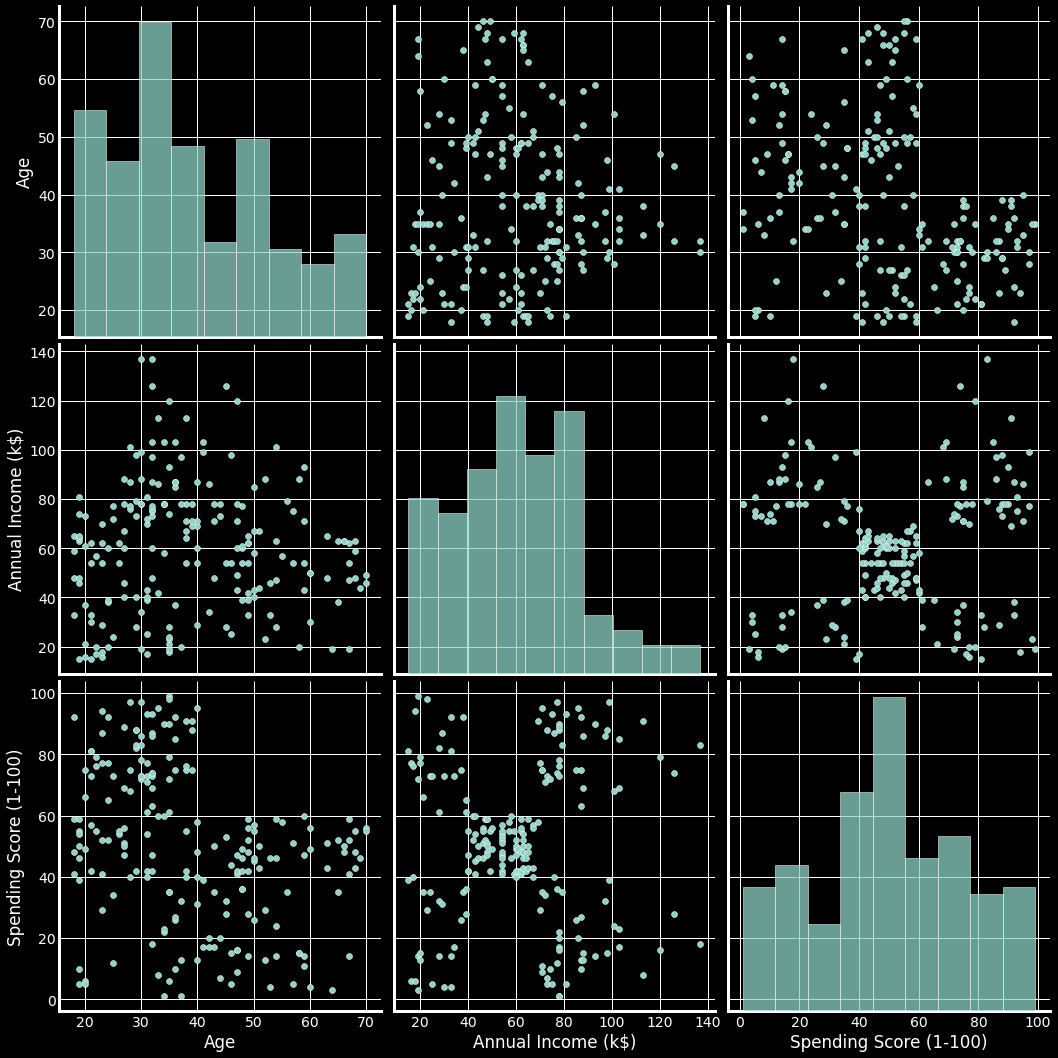

In [34]:
x = mall_customers[["Age", 'Annual Income (k$)', 'Spending Score (1-100)']]
sns.pairplot(x,height=5)

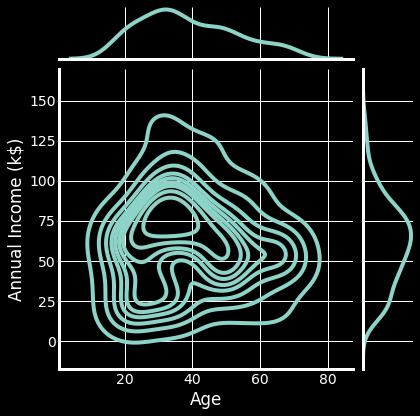

In [35]:
sns.jointplot(x=mall_customers['Age'], y=mall_customers['Annual Income (k$)'], kind="kde")

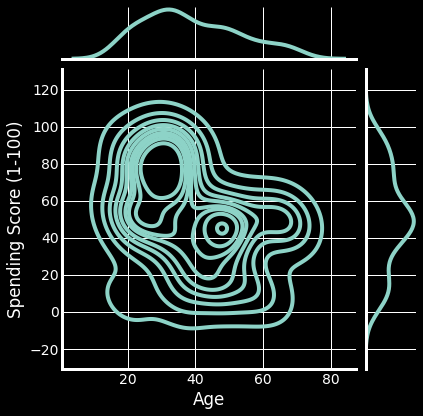

In [36]:
sns.jointplot(x=mall_customers['Age'], y=mall_customers['Spending Score (1-100)'], kind="kde")

In [115]:
top_10_val = mall_customers.head(n=10)
display(top_10_val)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 7. Transform Gender feature to number form via One-hot

In [116]:
gender = mall_customers[['Gender']].values

In [117]:
ohe = OneHotEncoder()
ohe.fit(gender)
ohe.categories_

[array(['Female', 'Male'], dtype=object)]

In [122]:
feature_array = ohe.transform(gender).toarray()

In [120]:
feature_labels = np.array(ohe.categories_).ravel()

In [121]:
feature_labels

array(['Female', 'Male'], dtype=object)

In [123]:
feature_array

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [126]:
feature_df = pd.DataFrame(feature_array, columns=feature_labels)
display(feature_df)

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,1.0,0.0
197,0.0,1.0
198,0.0,1.0


In [127]:
one_hot_mall_customers = deepcopy(mall_customers)

one_hot_mall_customers = pd.concat([one_hot_mall_customers, feature_df], axis=1)

display(one_hot_mall_customers)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0.0,1.0
1,2,Male,21,15,81,0.0,1.0
2,3,Female,20,16,6,1.0,0.0
3,4,Female,23,16,77,1.0,0.0
4,5,Female,31,17,40,1.0,0.0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1.0,0.0
196,197,Female,45,126,28,1.0,0.0
197,198,Male,32,126,74,0.0,1.0
198,199,Male,32,137,18,0.0,1.0


## 7.2. Transform Gender feature to number form via Label encoder

In [128]:
gender = mall_customers[['Gender']].values

In [129]:
le = LabelEncoder()
le.fit(gender)
le.classes_

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Female', 'Male'], dtype=object)

In [130]:
gender_array = le.transform(gender)
np.transpose(gender_array)
gender_df = pd.DataFrame(gender_array, columns=['Gender'])
display(gender_df)

d:\github\introduction-to-data-mining\venv\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [131]:
label_encoder_mall_customers = deepcopy(mall_customers)

In [132]:
label_encoder_mall_customers[['Gender']] = gender_df
display(label_encoder_mall_customers)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 8. Use PCA to reduce 4 dimension of Gender & age & Annual Income & Spending Score to 3 dimension

In [141]:
selected_4_dim = label_encoder_mall_customers[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
display(selected_4_dim)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [142]:
ss_4_dim = StandardScaler().fit_transform(selected_4_dim)

In [144]:
ss_4_dim_df = pd.DataFrame(ss_4_dim, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
display(ss_4_dim_df)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [145]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(ss_4_dim)

In [146]:
principal_df = pd.DataFrame(principalComponents, columns=["PC1", 'PC2', 'PC3'])
display(principal_df)

,PC1,PC2,PC3
0,-0.406383,-0.520714,-2.072527
1,-1.427673,-0.367310,-2.277644
2,0.050761,-1.894068,-0.367375
3,-1.694513,-1.631908,-0.717467
4,-0.313108,-1.810483,-0.426460
...,...,...,...
195,-1.179572,1.324568,1.932441
196,0.672751,1.221061,2.438084
197,-0.723719,2.765010,0.583178
198,0.767096,2.861930,1.150341


## 9. Evaluate PCA explainded_variance_ratio

In [147]:
pca.explained_variance_ratio_

array([0.33690046, 0.26230645, 0.23260639])

In [148]:
pca.explained_variance_

array([1.35437369, 1.05449828, 0.93510105])

In [149]:
pca = PCA(n_components=3)
principalComponents2 = pca.fit_transform(selected_4_dim)

In [152]:
principal2_df = pd.DataFrame(principalComponents2, columns=["PC1", 'PC2', 'PC3'])
display(principal2_df)

,PC1,PC2,PC3
0,-31.869945,-33.001252,-22.142987
1,0.764494,-56.842901,-10.542634
2,-57.408276,-13.124961,-28.750964
3,-2.168543,-53.478590,-9.511588
4,-32.174085,-30.388412,-10.225069
...,...,...,...
195,58.352515,31.017542,3.200135
196,19.908001,66.446108,1.242664
197,58.520804,38.346039,-0.834218
198,20.979130,79.376405,-13.645474


In [153]:
pca.explained_variance_ratio_

array([0.45118077, 0.44091539, 0.10774566])

In [154]:
pca.explained_variance_

array([700.26443231, 684.33184134, 167.22888104])